In [1]:
from mix_forward import mix_forward
import numpy as np

### 1. Rank - P relation at different mixing index $\mathcal{M}$

#### 1.1 Nm = 4

In [2]:
test = mix_forward(4,100,100,10,5,2000)

In [ ]:
test.order_m()

In [3]:
Plist = np.linspace(1,10,10,dtype=int)

In [4]:
from tqdm import tqdm_notebook

In [5]:
N = 100
M = 100
K = 5
Nc = 2000
rk1 = []
rk2 = []
rk3 = []
rk4 = []
f=0.5

for P in tqdm_notebook(Plist):
    model_P = mix_forward(4,N,M,P,K,Nc)
    model_P.generate_input()
    mtx_order1 = model_P.order_m(1,f)
    mtx_order2 = model_P.order_m(2,f)
    mtx_order3 = model_P.order_m(3,f)
    mtx_order4 = model_P.order_m(4,f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))
    rk4.append(np.linalg.matrix_rank(mtx_order4))

In [7]:
import matplotlib.pyplot as plt
from IPython import display

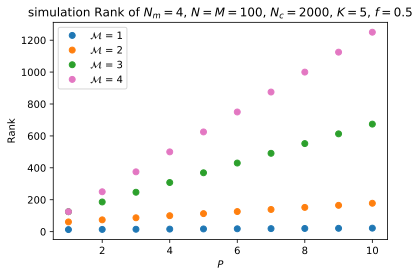

In [9]:
display.set_matplotlib_formats('svg')
plt.plot(Plist,rk1,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(Plist,rk2,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(Plist,rk3,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')
plt.plot(Plist,rk4,'o',color = 'tab:pink',label=r'$\mathcal{M}$ = 4')

#plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$P+2K-2$')
#plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$(P-1)(2K-1)+K^2$')
#plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$PK^2$')
#plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'simulation Rank of $N_m = 4$, $N=M =100$, $N_c = 2000$, $K=5$, $f=0.5$')
plt.xlabel(r'$P$')
plt.ylabel('Rank')
plt.legend()

plt.show()

#### 1.2 Nm = 5

In [12]:
N = 100
M = 100
K = 4
Nc = 3000
rk1 = []
rk2 = []
rk3 = []
rk4 = []
rk5 = []
f=0.5

for P in tqdm_notebook(Plist):
    model_P = mix_forward(5,N,M,P,K,Nc)
    model_P.generate_input()
    mtx_order1 = model_P.order_m(1,f)
    mtx_order2 = model_P.order_m(2,f)
    mtx_order3 = model_P.order_m(3,f)
    mtx_order4 = model_P.order_m(4,f)
    mtx_order5 = model_P.order_m(5,f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))
    rk4.append(np.linalg.matrix_rank(mtx_order4))
    rk5.append(np.linalg.matrix_rank(mtx_order5))

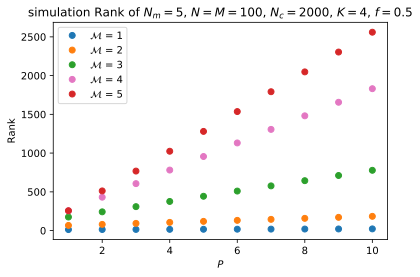

In [13]:
display.set_matplotlib_formats('svg')
plt.plot(Plist,rk1,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(Plist,rk2,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(Plist,rk3,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')
plt.plot(Plist,rk4,'o',color = 'tab:pink',label=r'$\mathcal{M}$ = 4')
plt.plot(Plist,rk5,'o',color = 'tab:red',label=r'$\mathcal{M}$ = 5')


#plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$P+2K-2$')
#plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$(P-1)(2K-1)+K^2$')
#plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$PK^2$')
#plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'simulation Rank of $N_m = 5$, $N=M =100$, $N_c = 2000$, $K=4$, $f=0.5$')
plt.xlabel(r'$P$')
plt.ylabel('Rank')
plt.legend()

plt.show()

### 2. Rank-Sparsity in 3 Modality, fully mixed

#### 2.1 Realtion to Nc

In [14]:
P = 25
K = 5
N = 100
M = 100
Nm = 3
Nc_list = [1000,1500,2000,3000]

In [15]:
rk_1000=[]
rk_1500=[]
rk_2000=[]
rk_3000=[]

for Nc in tqdm_notebook(Nc_list,desc='1st loop'):
    
    flist = np.linspace(1,20,20)/float(Nc)
    model3_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_Nc.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rk_'+str(Nc)].append(np.linalg.matrix_rank(model3_f_Nc.order_m(3,f)))

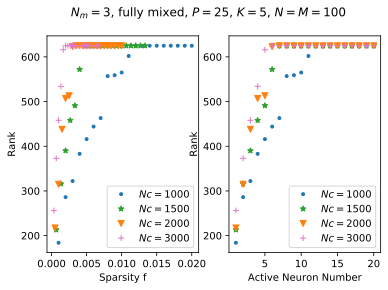

In [23]:
fig,axs = plt.subplots(1,2)
axs[0].plot(np.linspace(1,20,20)/1000,rk_1000,'.',color = 'tab:blue',label=r'$Nc=1000$')
axs[0].plot(np.linspace(1,20,20)/1500,rk_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[0].plot(np.linspace(1,20,20)/2000,rk_2000,'v',color = 'tab:orange',label=r'$Nc=2000$')
axs[0].plot(np.linspace(1,20,20)/3000,rk_3000,'+',color = 'tab:pink',label=r'$Nc=3000$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,20,20),rk_1000,'.',color = 'tab:blue',label=r'$Nc=1000$')
axs[1].plot(np.linspace(1,20,20),rk_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[1].plot(np.linspace(1,20,20),rk_2000,'v',color = 'tab:orange',label=r'$Nc=2000$')
axs[1].plot(np.linspace(1,20,20),rk_3000,'+',color = 'tab:pink',label=r'$Nc=3000$')
#axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=25$, $K=5$, $N=M=100$')
plt.show()

#### 2.2 Relation to P (or full rank)

In [ ]:
K = 5
N = 100
M = 100
Nm = 3
Nc = 1000

In [ ]:
P_list = []

In [26]:
5*5*5

125